<a href="https://colab.research.google.com/github/Himanshut504/NYC-taxi-trip-duration-prediction/blob/main/final_nyc_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
# import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Capstone project 2- NYC Taxi/NYC Taxi Data.csv')

In [5]:
df.shape

(1458644, 11)

In [6]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [9]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


The returned table gives certain insights:
- There are no numerical columns with missing data
- The passenger count varies between 1 and 9 with most people number of people being 1 or 2
- The trip duration varying from 1s to 1939736s~538 hrs. There are definitely some outliers present which must be treated.
#### Lets have a quick look at the non-numerical columns,

In [10]:
non_num_cols=['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']
print(df[non_num_cols].count())

id                    1458644
pickup_datetime       1458644
dropoff_datetime      1458644
store_and_fwd_flag    1458644
dtype: int64


- There are no missing values for the non numeric columns as well.
- The 2 columns pickup_datetime and dropoff_datetime are now converted to datetime format which makes analysis of date and time data much more easier.

In [11]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])


# Univariate Analysis

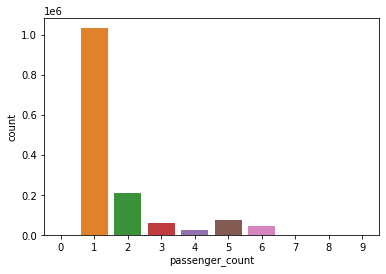

In [12]:
# Passenger count
sns.countplot(df['passenger_count'])

- Here we see that the mostly 1 or 2 passengers avail the cab. - The instance of large group of people travelling together is rare.
- Further the cab with 9 peoples can be considred outlier 

In [13]:
df['pickup_datetime'].nunique()

1380222

In [14]:
df['dropoff_datetime'].nunique()

1380377

- The returned values are 1380222 and 1380377. This shows that there are many different pickup and drop off dates in these 2 columns.
##### So its better to convert these dates into days of the week so a pattern can be found.

In [15]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [16]:
pd.DataFrame(df['pickup_day'].value_counts())

,pickup_day
Friday,223533
Saturday,220868
Thursday,218574
Wednesday,210136
Tuesday,202749
Sunday,195366
Monday,187418


In [17]:
pd.DataFrame(df['dropoff_day'].value_counts())

,dropoff_day
Friday,223031
Saturday,220902
Thursday,217746
Wednesday,209790
Tuesday,202518
Sunday,197224
Monday,187433


- Thus we see most trips were taken on Friday and Monday being the least. 
- The distribution of trip duration with the days of the week is something to look into as well.
#### The distribution of days of the week can be seen graphically as well.

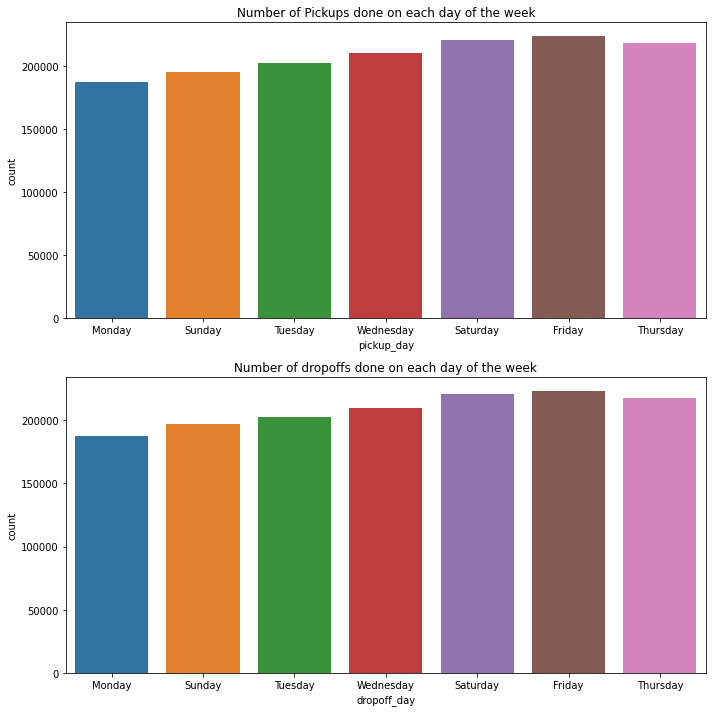

In [18]:
figure, ax=plt.subplots(nrows=2, ncols=1, figsize=(10,10))
sns.countplot(x='pickup_day', data=df, ax=ax[0])

ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])

ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

### The distribution of Pickup and Drop Off hours of the day
The time part is represented by hours,minutes and seconds which is difficult for the analysis thus we divide the times into 4 time zones: morning (4 hrs to 10 hrs) , midday (10 hrs to 16 hrs) , evening (16 hrs to 22 hrs) and late night (22 hrs to 4 hrs)

In [19]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

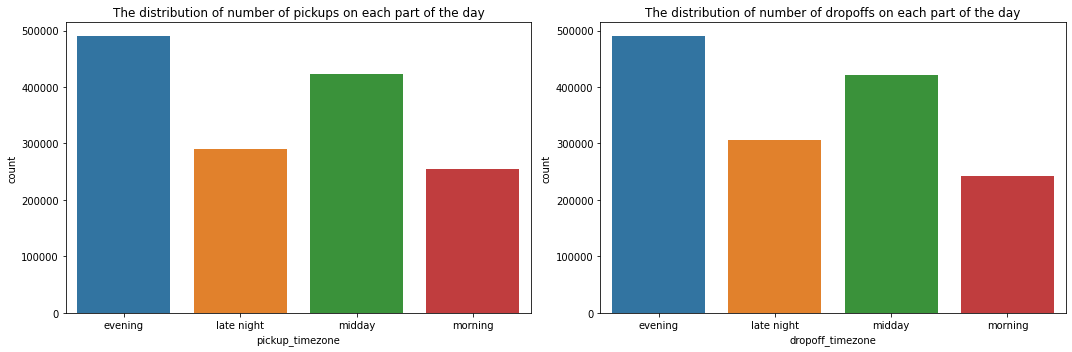

In [20]:
# Timezone distribution
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])

ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])

ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

 - Thus we observe that most pickups and drops occur in the evening. 
 - While the least drops and pickups occur during morning.


#### Lets have another column depicting the hour of the day when the pickup was done.

Text(0.5, 1.0, 'Distribution of dropoff hours')

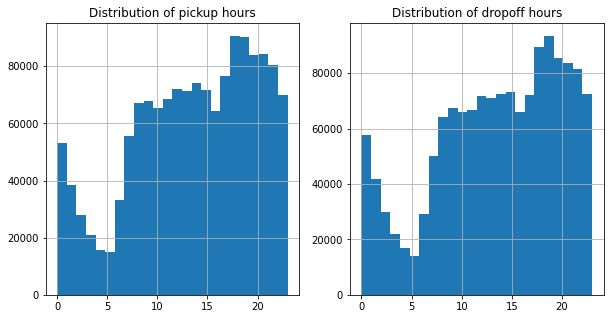

In [21]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df['pickup_hour']=df['pickup_datetime'].dt.hour

df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')

df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

The 2 distributions are almost similar and are also aligned with the division of the hours of the day into 4 parts and their distribution done previously.

### Distribution of the stored and forward flag


In [22]:
df['store_and_fwd_flag'].value_counts()


N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64


- The returned frequency distribution of the Yes/No Flag
- The number of N flag is much larger. We can later see whether they have any relation with the duration of the trip.

### Distribution of the trip duration 

Text(0.5, 1.0, 'The distribution of of the Pick Up  Duration distribution')

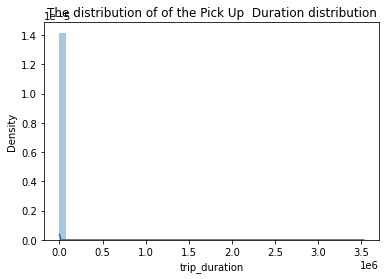

In [23]:
sns.distplot(df['trip_duration'],kde=True)
plt.title('The distribution of of the Pick Up  Duration distribution')

This histogram shows extreme right skewness, hence there are outliers. Lets see the boxplot of this variable.

Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

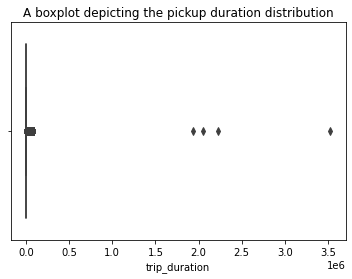

In [24]:
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

In [25]:
print( df['trip_duration'].nlargest(10))

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64


In [26]:
df = df[df['trip_duration'] < 1939736]

In [27]:
print( df['trip_duration'].nlargest(5))

1234291    86392
295382     86391
73816      86390
59891      86387
1360439    86385
Name: trip_duration, dtype: int64


Text(0.5, 1.0, 'Distribution of the pickup ditribution after the treatment of outliers')

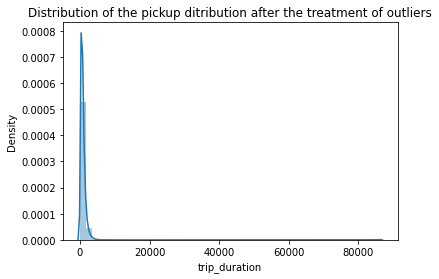

In [28]:
# Lets have a look at the distribution of the trip_duration after we have dropped the outlier.
sns.distplot(df['trip_duration'])
plt.title('Distribution of the pickup ditribution after the treatment of outliers')

Still there is an extreme right skewness. Thus we will divide the trip_duration column into some interval.
The intervals are decided as follows:
- less than 5 hours
- 5–10 hours
- 10–15 hours
- 15–20 hours
- more than 20 hours

In [29]:
bins=np.array([0,1800,3600,5400,7200,90000])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

In [30]:
df['duration_time']

0           < 5
1           < 5
2          5-10
3           < 5
4           < 5
           ... 
1458639     < 5
1458640     < 5
1458641     < 5
1458642     < 5
1458643     < 5
Name: duration_time, Length: 1458640, dtype: category
Categories (5, object): ['< 5' < '5-10' < '10-15' < '15-20' < '>20']

### Distribution of pickup longitude 

Text(0.5, 1.0, 'The distribution of Pick up Longitude')

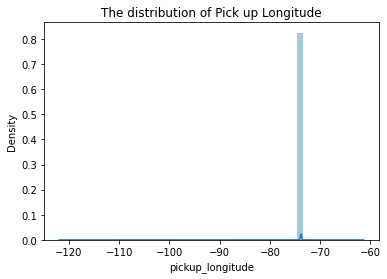

In [31]:
sns.distplot(df['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')

### Distribution of dropoff longitude

Text(0.5, 1.0, 'The distribution of Drop off Longitude')

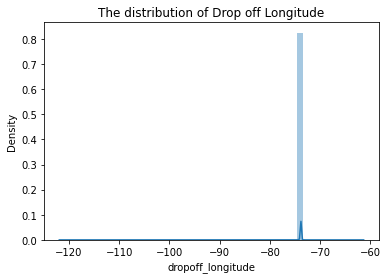

In [32]:
sns.distplot(df['dropoff_longitude'])
plt.title('The distribution of Drop off Longitude')

### Distribution of dropoff latitude


Text(0.5, 1.0, 'The distribution of drop off Latitude')

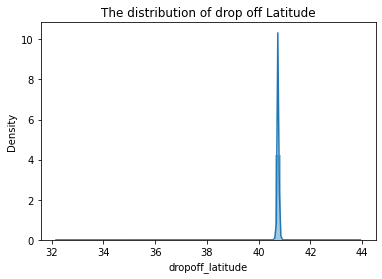

In [33]:
sns.distplot(df['dropoff_latitude'])
plt.title('The distribution of drop off Latitude')

### Distribution of pickup latitude

Text(0.5, 1.0, 'The distribution of pick up Latitude')

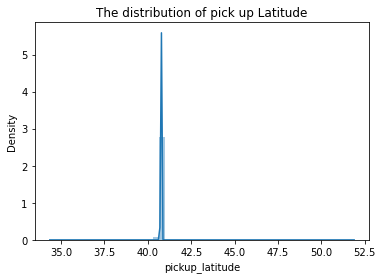

In [34]:
sns.distplot(df['pickup_latitude'])
plt.title('The distribution of pick up Latitude')


We see that the pickup longitude and the dropoff longitude has almost the same kind of distribution while the pickup latitude and the dropoff latitude has slightly different distribution.

### Distribution of vendor_id 

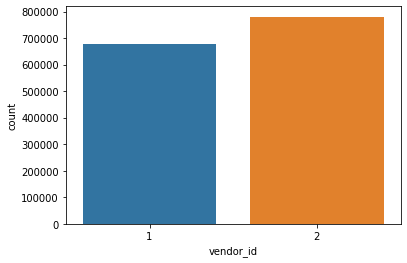

In [35]:
sns.countplot(df['vendor_id'])

## Bivariate Analysis 

Text(0.5, 1.0, 'The Average Trip Duration per Dropoff Day of the week')

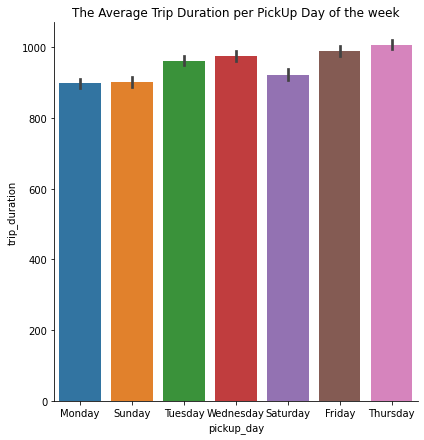

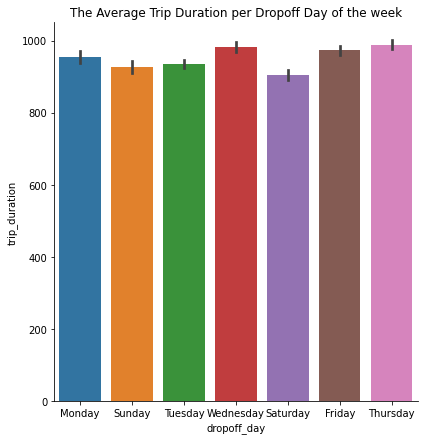

In [36]:
# The relationship between Trip Duration and The day of the week

sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')

sns.catplot(x="dropoff_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')

- The graphs denote the average estimate of a trip for each day of the week. 
- The error bars provides some indication of the uncertainty around that estimate
- Thus the highest avg time taken to complete a trip is on Thursday while Monday, Saturday and Sunday takes the least time.
But this is not enough. 
- We must also take into consideration the percentage of short, medium and long trips taken on each day.

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

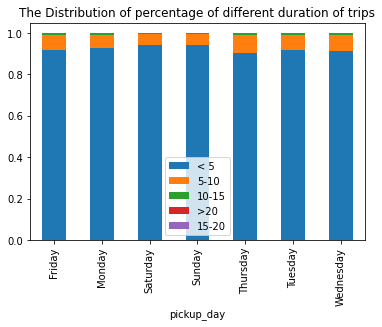

In [37]:
ax1=df.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

- The graph shows a percentage distribution of the trips of different duration within each day of the week.
- This does not give much insights as the number of trips within 0–5 hours range is much larger for all the days,
- Lets look at the percentage of only longer trips (with duration time > 5 hours)

Text(0.5, 1.0, 'A compared distribution of trips > 5 hours')

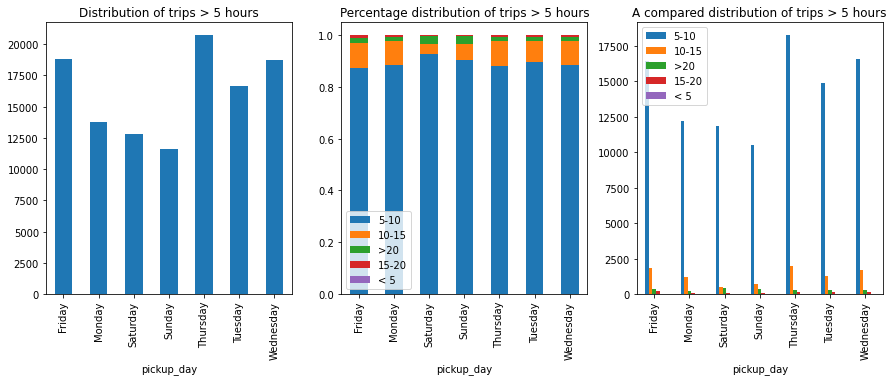

In [38]:
figure,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].count()
ax1.plot(kind='bar',ax=ax[0])
ax[0].set_title('Distribution of trips > 5 hours')

ax2=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True',ax=ax[1])
ax[1].set_title('Percentage distribution of trips > 5 hours')

ax3=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts().unstack()
ax3.plot(kind='bar',ax=ax[2])
ax[2].set_title('A compared distribution of trips > 5 hours')

- The 3 graphs present 3 types of information here:
- The left most graph shows a frequency distribution of the number of trips(> 5 hours ) taken on each day of the week
- The middle one shows a percentage distribution of the trips of different duration ( > 5 hours )within each day of the week.
- The right one shows the frequency distribution of the trips of different duration (> 5 hours)within each day of the week.

#### Some key points :

- The most number trips which lasts > 5 hours were taken on Thursday followed by Friday and Wednesday.(Left graph)
- The most number of trips of duration 5–10, 10–15 was taken on Thursday.(right graph)
- But the highest percentage of trips longer than 20 hours was taken on Sunday and Saturday.(middle graph)

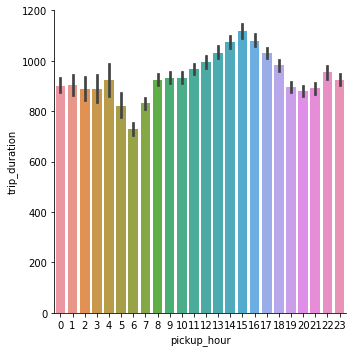

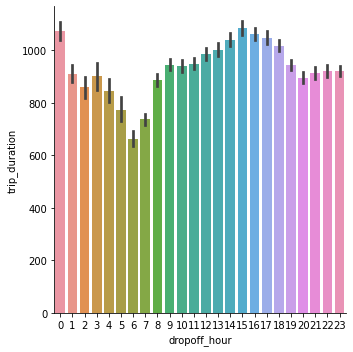

In [39]:
# The relationship between Trip Duration and The time of the day
# figure,ax=plt.subplots(nrows=1,ncols=2)

# ax[0].set_title('Distribution of pickup hours')
sns.catplot(x="pickup_hour", y="trip_duration",kind="bar",data=df)

# ax[1].set_title('Distribution of dropoff hours')
sns.catplot(x="dropoff_hour", y="trip_duration",kind="bar",data=df)
plt.show()

The highest average time taken to complete a trip are for trips started in midday(between 14 and 17 hours) and the least are the ones taken in the early morning(between 6–7 hours)

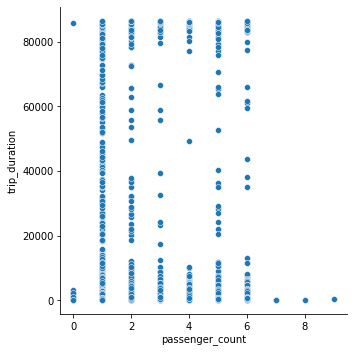

In [40]:
# The relationship between passenger count and duration
sns.relplot(x="passenger_count", y="trip_duration", data=df, kind="scatter")


- Here we see, passenger count has no such relationship with trip duration. 
- But it is noted that there are no long trips taken by higher passengers counts like 7 or 9. 
- while the trip duration time is more or less evenly distributed only for passenger count 1.

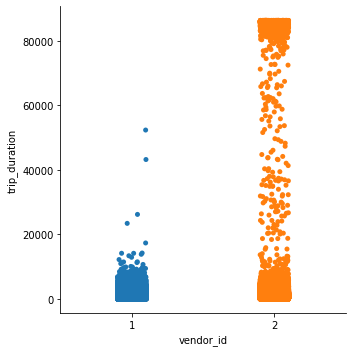

In [41]:
#The relationship between vendor id and duration

sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=df)

Here we see that vendor 1 mostly provides short trip duration cabs while vendor 2 provides cab for both short and long trips

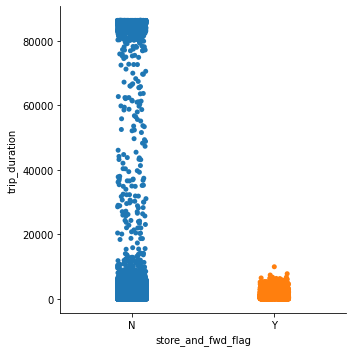

In [42]:
#The relationship between store forward flag and duration
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=df)

Thus we see the flag was stored only for short duration trips and for long duration trips the flag was never stored.

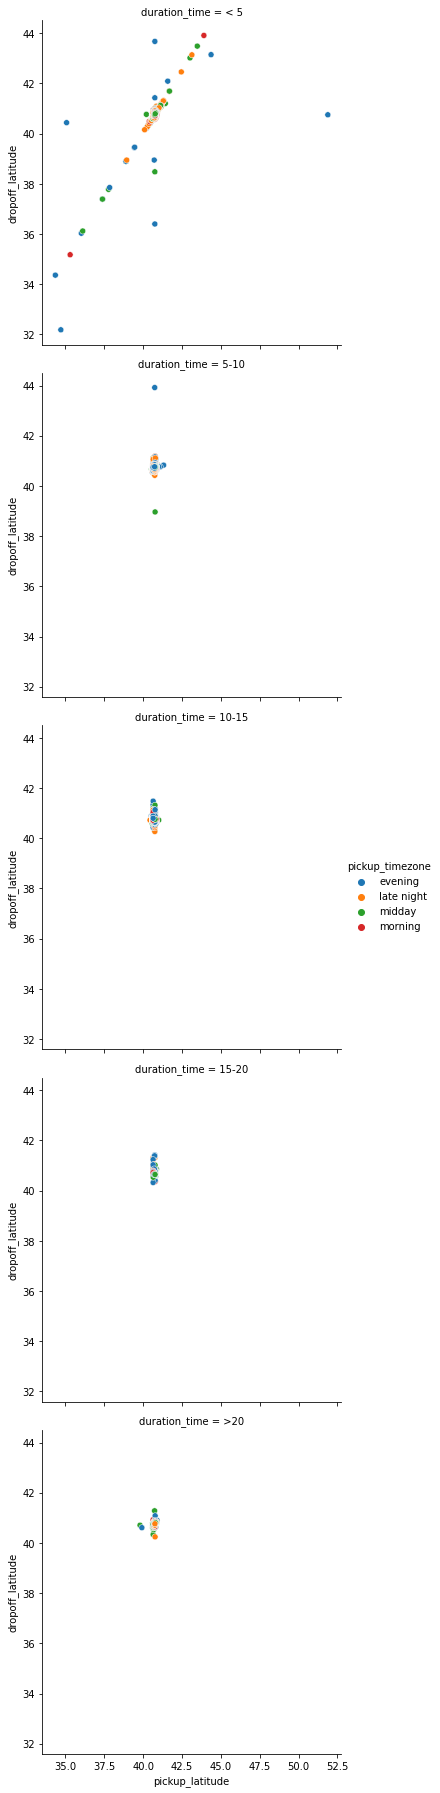

In [43]:
#The relationship between geographical location and duration
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='pickup_timezone',row='duration_time',data=df);

Here’s what we see
- for shorter trips (<5 hours), the pickup and dropoff latitude is more or less evenly distributed between 30 ° and 40 °
- for longer trips(>5 hours ) the pickup and dropoff latitude is all concentrated between 40 ° and 42 ° degrees.

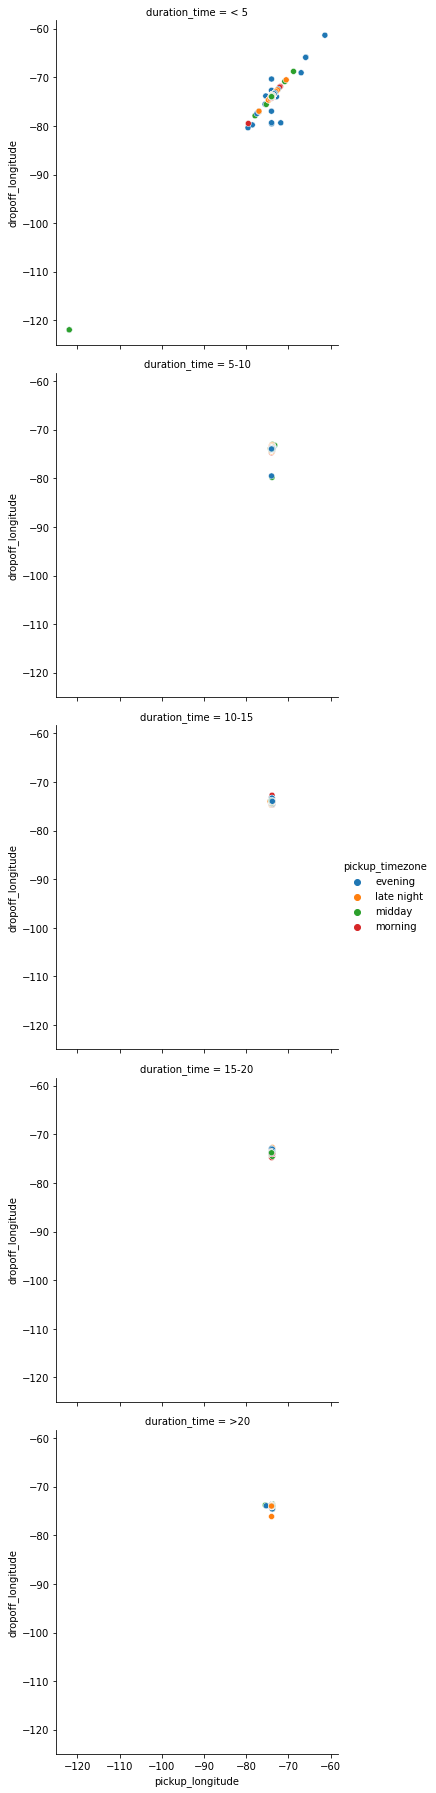

In [44]:
sns.relplot(x="pickup_longitude", y="dropoff_longitude",hue='pickup_timezone',row='duration_time',data=df);

Here’s what we see
- for shorter trips (<5), the pickup and dropoff longitude is more or less evenly distributed between -80 ° and -65 ° with one outlier near -120 ° .
- for longer trips(>5) the pickup and dropoff longitude is all concentrated near -75 °

#### Conclusion about Trip Duration and the data set:
- Trip Duration varies a lot ranging from few seconds to more than 20 hours
- Most trips are taken on Friday , Saturday and Thursday
- The average duration of a trip is most on Thursday and Friday as trips longer than 5 hours are mostly taken in these days
- The average duration of trips started in between 14 hours and 17 hours is the largest.
- Vendor 2 mostly provides the longer trips
- The long duration trips(> 5 hours) are mostly concentrated with their pickup region near (40 °,75 °) to (42°,75°)

### Trip duration

In [45]:
df['trip_duration'].sort_values().tail()

1360439    86385
59891      86387
73816      86390
295382     86391
1234291    86392
Name: trip_duration, dtype: int64

In [46]:
df['trip_duration'].sort_values().head()

207497     1
1382872    1
35196      1
346102     1
1306890    1
Name: trip_duration, dtype: int64

In [47]:
df=df[df.trip_duration!=df.trip_duration.min()]

In [48]:
df['trip_duration'].sort_values().head()

1125618    2
360879     2
730299     2
1218160    2
702422     2
Name: trip_duration, dtype: int64

- We will now create another column with the trip_duration represented in hours. 
- This will be later used for finding out the speed of each trips

In [49]:
df['trip_duration_hour']=df['trip_duration']/3600

### Passenger Count

In [50]:
#We will have a look at the passenger count frequencies
df.passenger_count.value_counts()

1    1033506
2     210316
5      78088
3      59896
6      48333
4      28404
0         59
7          3
9          1
8          1
Name: passenger_count, dtype: int64







Here the no of records with passenger count 0,9 and 7 are very small compared to the entire data set. Hence, we will drop the values.


In [51]:
df=df[df.passenger_count<=6]
df=df[df.passenger_count!=0]

### Pickup_datetime and Dropoff_datetime
- We have already converted these 2 columns into datetime type in the last story. Now we create new columns depicting the month - and day of the week the particular trip took place.

In [52]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [53]:
# Lets have a look at the distribution of the pickup and drop off months distributions
df['pickup_month'].value_counts()

3    256174
4    251627
5    248472
2    238280
6    234308
1    229682
Name: pickup_month, dtype: int64

In [54]:
df['dropoff_month'].value_counts()

3    256118
4    251618
5    248540
2    238274
6    234235
1    229631
7       127
Name: dropoff_month, dtype: int64

- All the months has uniform distribution of trips.
- No data is present for pickup months beyond June. 
- There are few data present in July for drop off months. It may be outlier as well. We will have to look into that.
- For the drop offs done in July we will find the frequency distribution of the corresponding pickup month.
- We find the corresponding date as well.

In [55]:
print(df[df.dropoff_month==7].pickup_datetime.dt.month.value_counts())
print(df[df.dropoff_month==7].pickup_datetime.dt.day.value_counts())

6    127
Name: pickup_datetime, dtype: int64
30    127
Name: pickup_datetime, dtype: int64


### Trip Distance, Speed, Time
We are creating a function which returns the distance between a pair of latitudes and longitudes using the haversine distance formula.

In [56]:
from geopy.distance import great_circle

In [57]:
def calc_dist(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [58]:
df['distance'] = df.apply(lambda x: calc_dist(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis=1)

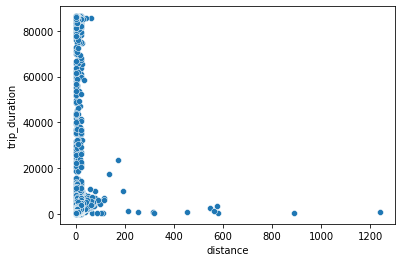

In [59]:
# We will have a look at the distribution of this distance feature against the trip_duration value.
sns.scatterplot(x='distance',y='trip_duration',data=df)

- We can see several outliers with values much beyond 200km and many values with trip_distance = 0km. 
- These may be the rows depicting cancelled rides. Lets have a look at how many such rides are there.

In [60]:
print('The no of rows with distance =0 are {}'.format(len(df[df.distance==0])))

The no of rows with distance =0 are 5876


In [61]:
# That’s quite a number! We will not drop these rows. Rather we will replace these datas with the average distance
mean_dist=df['distance'].mean()
df.loc[df['distance']==0,'distance']=mean_dist

We will now create a new feature called speed. This will help us in identifying data points where time taken and distance covered does not match up. We will also have a look at the distribution of trip speed.

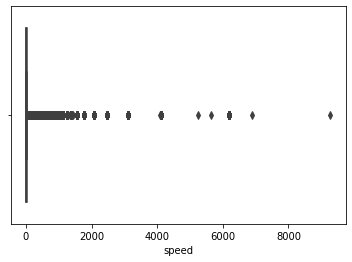

In [62]:
df['speed']=df['distance']/df['trip_duration_hour']
sns.boxplot(df['speed'])

- Here we see several outliers. 
- The average speed of a taxi in New York City is about 11 km/hour. 
- The data has several data points with a speed way beyond that.
- We will now have a look at the distribution of the distance variable against the trip duration in hour feature.

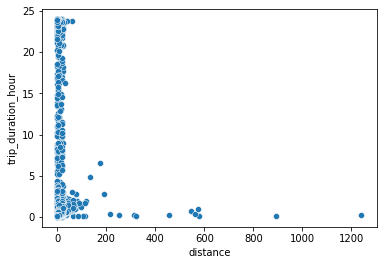

In [63]:
sns.scatterplot(x='distance',y='trip_duration_hour',data=df)

- Here we see several data points where the distance is < 20 km and the time taken to be >10 hours. 
- This is very absurd as the avg speed is 11 km/hour.These might be due to extreme road congestion. 
- Lets log transform these columns and have a look at the distribution again.

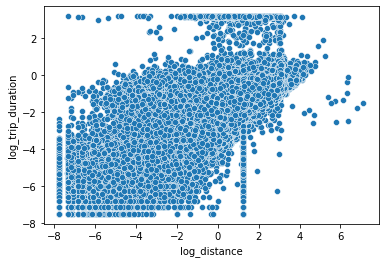

In [64]:
df['log_distance']=np.log(df.distance)
df['log_trip_duration']=np.log(df.trip_duration_hour)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

Here we see that the log transformed value of trip duration and distance has a somewhat linear relationship. But still there are some anomalous data points where the duration value is not changing even with the change in distance.
We will thus drop the rows beyond log_trip_duration > 2

In [65]:
df=df[df.log_trip_duration<2]

In [66]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_timezone',
       'dropoff_timezone', 'pickup_hour', 'dropoff_hour', 'duration_time',
       'trip_duration_hour', 'pickup_month', 'dropoff_month', 'distance',
       'speed', 'log_distance', 'log_trip_duration'],
      dtype='object')

- Now, we won’t use all of them to build our model as this would make the model very complex. 
- We create a new data frame data2 to select only the features which had some effect on the target variable trip_duration.
- We dropped certain features as they were transformed to other features. 
- We dropped the nominal features as well.
#### eg: latitude longitudes were converted to distance,pickup and drop off datetime were converted corresponding months and weekdays etc.

In [67]:
data2=df.loc[:,['passenger_count','store_and_fwd_flag','trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
   'dropoff_month','pickup_timezone','dropoff_timezone','speed','log_distance','distance']]

In [68]:
# We will now transform the categorical features from data2 dataframe through one hot encoding.
data2=pd.get_dummies(data2,columns=['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month','pickup_timezone', 'dropoff_timezone'])

In [69]:
#Now we will have a look at the correlation heatmap between each features so that it is easier for us to choose the best features

df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,dropoff_hour,trip_duration_hour,pickup_month,dropoff_month,distance,speed,log_distance,log_trip_duration
vendor_id,1.000000,0.287515,0.007808,0.001828,0.001502,0.004517,0.009217,0.009336,0.009416,0.009217,-0.006266,-0.006272,0.008482,-0.013834,0.013241,0.012201
passenger_count,0.287515,1.000000,0.002188,-0.005226,-0.000336,-0.002820,0.014840,0.009129,0.008504,0.014840,-0.002251,-0.002271,0.010335,-0.008371,0.013365,0.018738
pickup_longitude,0.007808,0.002188,1.000000,0.022896,0.783893,0.100329,0.191102,0.010171,0.010883,0.191102,0.004473,0.004511,0.261010,0.030275,0.170852,0.113443
pickup_latitude,0.001828,-0.005226,0.022896,1.000000,0.115026,0.494189,-0.199474,0.010557,0.016910,-0.199474,-0.001419,-0.001483,-0.211199,-0.012898,-0.162470,-0.147844
dropoff_longitude,0.001502,-0.000336,0.783893,0.115026,1.000000,0.125027,0.111949,-0.022430,-0.023304,0.111949,0.004769,0.004798,0.135150,0.021090,0.132514,0.073413
dropoff_latitude,0.004517,-0.002820,0.100329,0.494189,0.125027,1.000000,-0.159454,0.013630,0.017223,-0.159454,-0.000595,-0.000640,-0.143344,-0.020140,-0.098658,-0.126879
trip_duration,0.009217,0.014840,0.191102,-0.199474,0.111949,-0.159454,1.000000,0.029466,0.033470,1.000000,0.058694,0.058857,0.697019,-0.024471,0.695927,0.848648
pickup_hour,0.009336,0.009129,0.010171,0.010557,-0.022430,0.013630,0.029466,1.000000,0.934056,0.029466,-0.003450,-0.003179,-0.015875,-0.014699,-0.010367,0.040311
dropoff_hour,0.009416,0.008504,0.010883,0.016910,-0.023304,0.017223,0.033470,0.934056,1.000000,0.033470,-0.004749,-0.005136,-0.020813,-0.016143,-0.017314,0.041309
trip_duration_hour,0.009217,0.014840,0.191102,-0.199474,0.111949,-0.159454,1.000000,0.029466,0.033470,1.000000,0.058694,0.058857,0.697019,-0.024471,0.695927,0.848648


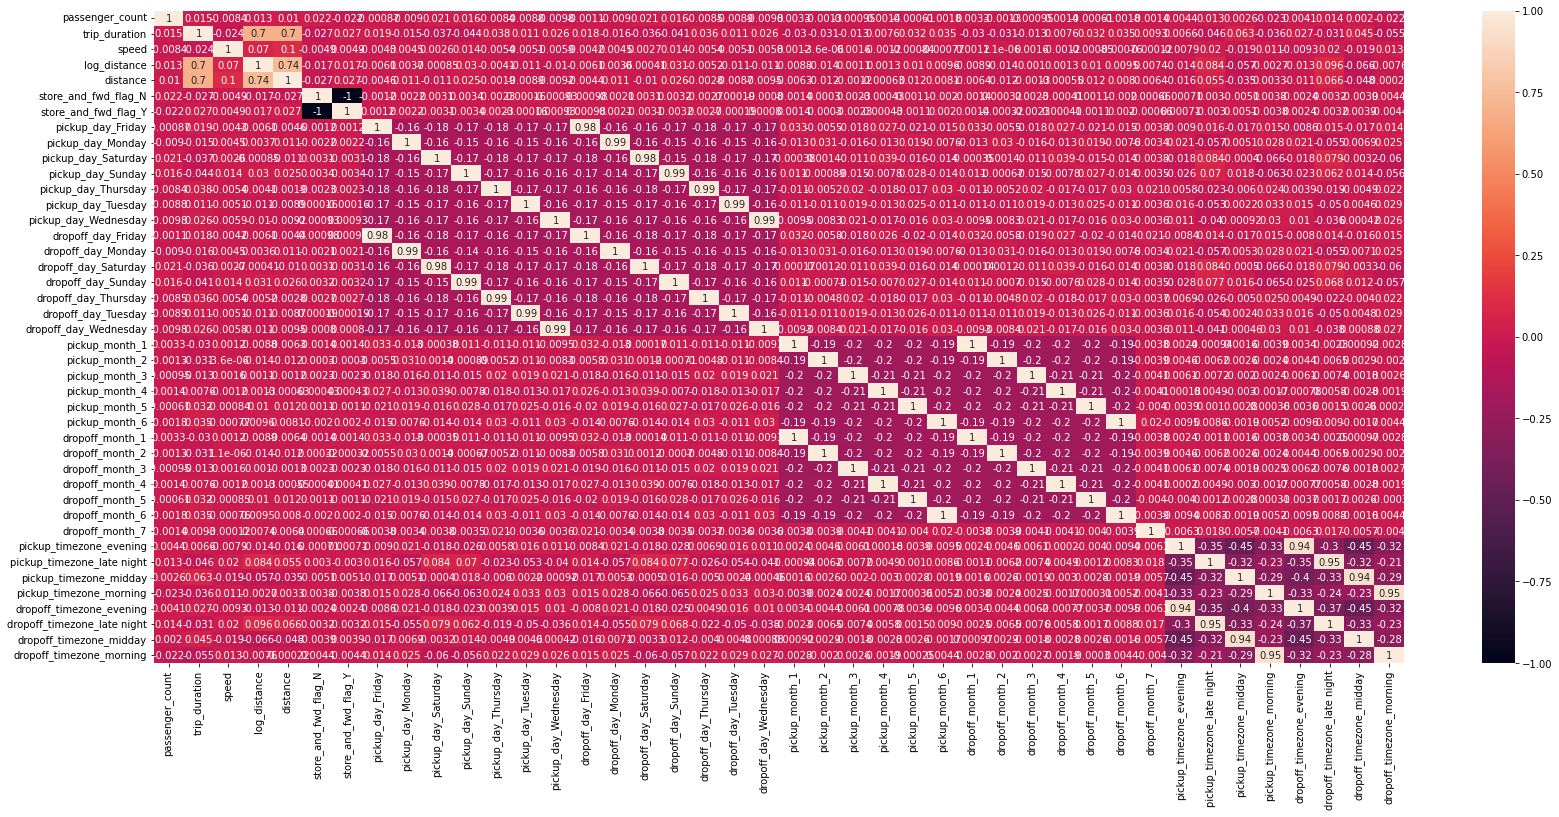

In [70]:
plt.figure(figsize=(28,12))
sns.heatmap(data2.corr(),annot=True)

- Thus we see that some features has high correlation with other features and some are not correlated at all.
- First we will create a model with the mean of trip duration as the prediction. 
- Then we will create a base line model with only distance and it has a correlation > 5 with trip_duration. 
- Next, we will choose the other features which are positively correlated with trip_duration and create the third model.
- We will split our data into 2 parts. 
- The first part we will use to train our data and the 2nd part will be used for testing.

In [71]:
base_line_col=['distance']
X=['passenger_count','distance','store_and_fwd_flag_N','store_and_fwd_flag_Y',
               'pickup_day_Friday','pickup_day_Monday','pickup_day_Saturday','pickup_day_Sunday',
               'pickup_day_Thursday','pickup_day_Tuesday','pickup_day_Wednesday','dropoff_day_Friday',
               'dropoff_day_Monday','dropoff_day_Saturday','dropoff_day_Sunday','dropoff_day_Thursday',
               'dropoff_day_Tuesday','dropoff_day_Wednesday','pickup_month_1','pickup_month_5','pickup_month_6',
               'dropoff_month_1','dropoff_month_5','dropoff_month_6','pickup_timezone_late night',
               'pickup_timezone_midday','pickup_timezone_morning','dropoff_timezone_evening',
               'dropoff_timezone_late night','dropoff_timezone_midday','dropoff_timezone_morning']
target_col=['trip_duration']

# Algorithms that we shall use 

1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. Gradient Boosting
5. AdaBoosting
6. XGBoost

## Evaluation Metrices

- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error(RMSE)
- R-Squared (r2_score)

## Train test split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = data2.drop('trip_duration', axis=1)
y = data2['trip_duration']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
X.shape

(1456504, 41)

In [76]:
X_train.shape

(1019552, 41)

In [77]:
y_train

142641      216
542279      339
551972      364
127336      670
201653      470
           ... 
259539      454
1416502     491
132106      534
672117     1058
122115      509
Name: trip_duration, Length: 1019552, dtype: int64

In [78]:
y_test

76136      115
446554     871
842731     422
697540     654
1395087    574
          ... 
883857     577
104094     966
32906      484
168945     779
659817     462
Name: trip_duration, Length: 436952, dtype: int64

## Feature Scaling  

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()

In [81]:
X_train_scaled = scaler.fit_transform(X_train)

In [82]:
X_test_scaled = scaler.transform(X_test)

## 1. Linear Regression

Linear regression is used for finding linear relationship between target and one or more predictors. 
- There are two types of linear regression- Simple and Multiple.

In [83]:
#Importing the Linear Regression 
from sklearn.linear_model import LinearRegression

In [84]:
model = LinearRegression()

In [85]:
# Fitting the data on X_train and X_test
model.fit(X_train,y_train)

LinearRegression()

In [86]:
# Predicting
preds = model.predict(X_test)

In [87]:
# Evaluation Metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [88]:
mean_absolute_error(y_test, preds)

263.29351985212514

In [89]:
mean_squared_error(y_test, preds)**0.5

428.28985481545243

In [90]:
r2_score(y_test, preds)

0.5907516510937657

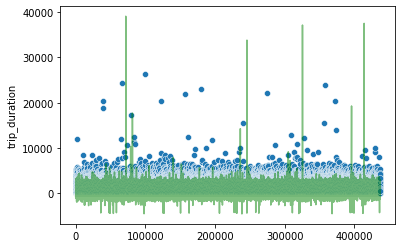

In [91]:
sns.scatterplot(x =range(0,len(y_test)),y = y_test, )
plt.plot(range(0,len(y_test)),preds, color = "green", alpha=0.5)

- Here the Linear Regression model performed relatively well. 
- The r2_score of 0.59 is acceptible.
- Yet we have MAE, MSE very high so let's check with outher alogithms.

In [92]:
len(y_train)

1019552

In [93]:
print(y_test.values)

[115 871 422 ... 484 779 462]


In [94]:
print(preds)

[314.28271484 750.26171875 934.30004883 ... 631.         733.02050781
 773.125     ]


## Function for model

In [95]:
def estimator(model, X ,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model.fit(X_train, y_train)
    preds = model.predict(y_test)
    
    print('Mean absolute error')
    mean_absolute_error(y_test, preds)
    
    print('Mean_squared_error')
    mean_squared_error(y_test, preds)
    
    print('Root mean square error')
    mean_squared_error(y_test, preds)**0.5

## Decision Tree

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [97]:
#Importing Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [98]:
#Creating model instance
dct = DecisionTreeRegressor()

In [99]:
#Fitting the model in training data
dct.fit(X_train, y_train)

DecisionTreeRegressor()

In [100]:
#Predicting the model on test data
preds1 = dct.predict(X_test)

In [101]:
#Calculating R2 score
r2_score(y_test, preds1)

0.9962052017205973

In [102]:
mean_squared_error(y_test, preds1)**0.5

41.24190016662974

In [103]:
from sklearn.tree import plot_tree

## GradientBoosting

In [105]:
#Importing Gradient Boosting algorithm
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
#Creating the instance of Gradient Boosting
gbr = GradientBoostingRegressor()

In [107]:
#Fitting the mode in the training data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [108]:
#Predicting the model in the testing dataset
preds = gbr.predict(X_test)

In [109]:
#Calculating the R2 -Score
r2_score(y_test, preds)

0.9880622014841494

In [110]:
#Calculating the Mean Squared Error
mean_squared_error(y_test, preds)**0.5

73.14867123513551

## AdaBoost

In [111]:
param_grid ={}

In [112]:
from sklearn.ensemble import AdaBoostRegressor

In [113]:
ada = AdaBoostRegressor()

In [114]:
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [115]:
preds = ada.predict(X_test)

In [116]:
r2_score(y_test, preds)

-0.04120835356701402

## XGBoost

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
#Importing XGBoost Regressor
from xgboost import XGBRegressor

In [119]:
#Creating the instance of 
xgb = XGBRegressor()

In [120]:
#Fitting the model with in XGBRegressor tree with default parameter
xgb.fit(X_train,y_train)

[08:09:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [121]:
#Predicting the model on the test data
preds = xgb.predict(X_test)

In [122]:
#Calculating the r2 score 
r2_score(y_test, preds)

0.9875027807726199

In [123]:
#Calculating the mean_squared_error
mean_squared_error(y_test, preds)

5601.470157695395

In [124]:
#Calculating the RMSE
mean_squared_error(y_test, preds)**0.5

74.84296999515315

# Conclusion

- Trip Duration varies a lot ranging from few seconds to more than 20 hours also some are going from 528 Hours to 972 Hours, possibly Outliers.
- Observed Vendor 2 taxi service provider is most Frequently used by New Yorkers.
- Trip duration is generally longer for trips whose flag was not stored.
- There were few trips with Zero Passengers and few trips with 7,8 and 9 passengers and Most number of trips are done by single or double passengers.
- Few Trip duration has covered 0 Km distance.
- Trip duration is the maximum around 3 pm and the lowest around 6 am.
- Trip duration is the longest on Thursdays closely followed by Fridays.
- From February, we can see trip duration rising every month also significant drop in the Taxi trip count as month end approach.
- for shorter trips (<5 hours), the pickup and dropoff latitude is more or less evenly distributed between 30 ° and 40 °
- for longer trips(>5 hours ) the pickup and dropoff latitude is all concentrated between 40 ° and 42 ° degrees.
- The long duration trips(> 5 hours) are mostly concentrated with their pickup region near (40 °,75 °) to (42°,75°)
